# BANK MARKETING

## Introduction
This project is based on the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains data collected from a Portuguese banking institution’s marketing campaigns. The dataset includes client information, campaign details, and economic indicators. It is well-suited for binary classification tasks and offers valuable insights into customer behavior and marketing effectiveness.

# Objective
The main objective of this project is to develop a machine learning model that can accurately predict whether a client will subscribe to a term deposit. This will help financial institutions identify potential customers, improve campaign targeting, and enhance overall marketing performance.

## Initial Step EDA (Exploratory Data Analysis)

In [5]:
# Importing necessary libraries

# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the data set

data = pd.read_csv("bank-full.csv", sep = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# Coverting to Data Frame

df = pd.DataFrame(data)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Data description

The dataset consists of 45,211 records with 16 input features and 1 target variable. It contains client demographic data, past contact information, and socio-economic indicators. Most features are categorical, requiring preprocessing before modeling.


Feature	Description

##### age      :	Age of the client
##### job      :    Job type (e.g., admin, technician, services)
##### marital  :	Marital status
##### education :	Education level
##### default	: Has credit in default? (yes/no)
##### balance	: Average yearly account balance (in euros)
##### housing	: Has a housing loan? (yes/no)
##### loan	: Has a personal loan? (yes/no)
##### contact	: Contact communication type (cellular, telephone)
##### day_of_week :	Day of week of last contact
##### month	: Last contact month
##### duration :	Duration of last contact (in seconds)
##### campaign	: Number of contacts during this campaign
##### pdays	: Days since last contact (-1 means not previously contacted)
##### previous	: Number of contacts before this campaign
##### poutcome	: Outcome of previous marketing campaign
##### y	(Target) : Subscription to a term deposit (yes/no)?

### Initial Inspection

In [10]:
# To view first few rows 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
# To view last few rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [12]:
# To get the dataset dimensions
print(f"Dataset contain {df.shape[0]}  Rows and {df.shape[1]} Columns ")

Dataset contain 45211  Rows and 17 Columns 


In [13]:
# Renaming column 'y' as 'Target'
df.rename(columns = {'y' : 'Target'}, inplace = True)

In [14]:
# View column names
print("Columns names: \n")
print(df.columns)

Columns names: 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


#### Understand the Dataset

In [16]:
# To get the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
# Checking for missing values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [18]:
# Checking for duplicates
df.duplicated().sum()

0

In [19]:
# Descriptive statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
# To get the number of unique values in each column
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [21]:
# Identifying numerical columns

numerical_df = df.select_dtypes ( include = 'int64')
numerical_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


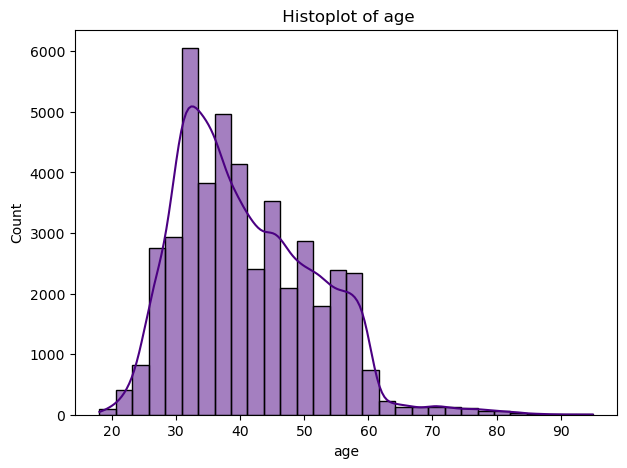

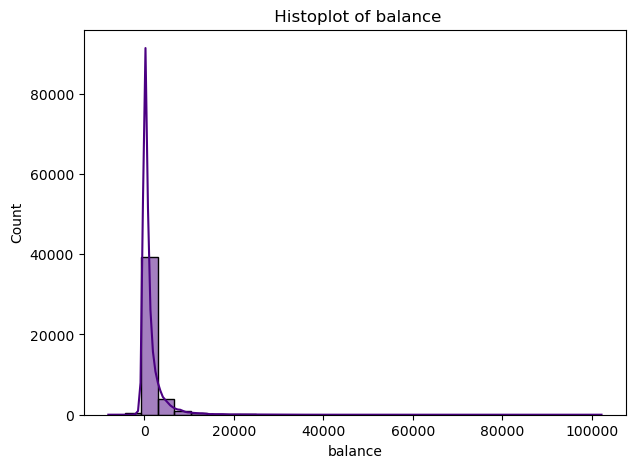

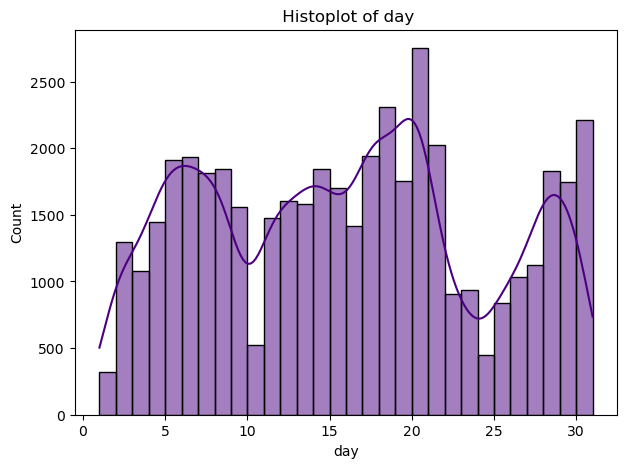

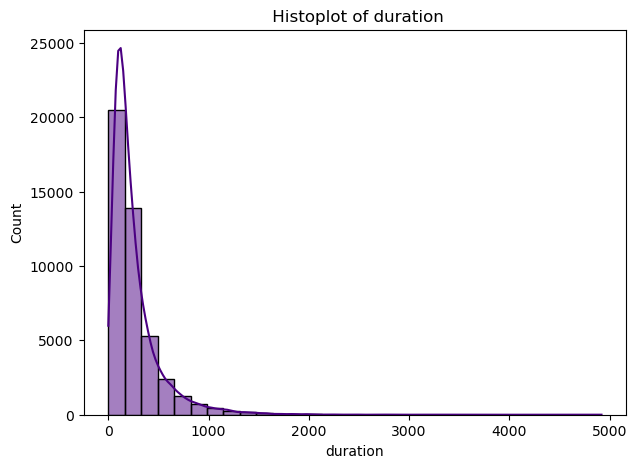

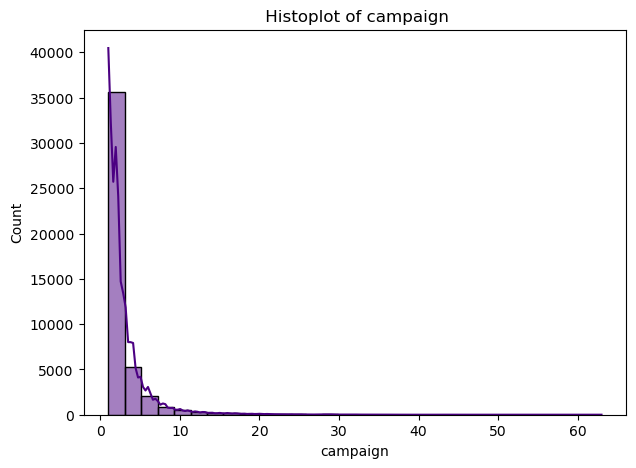

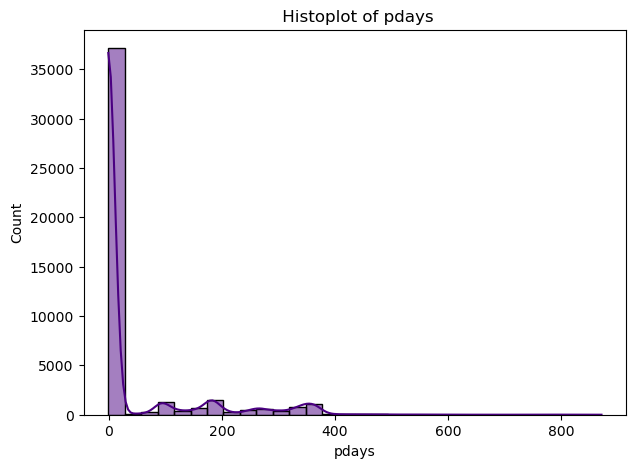

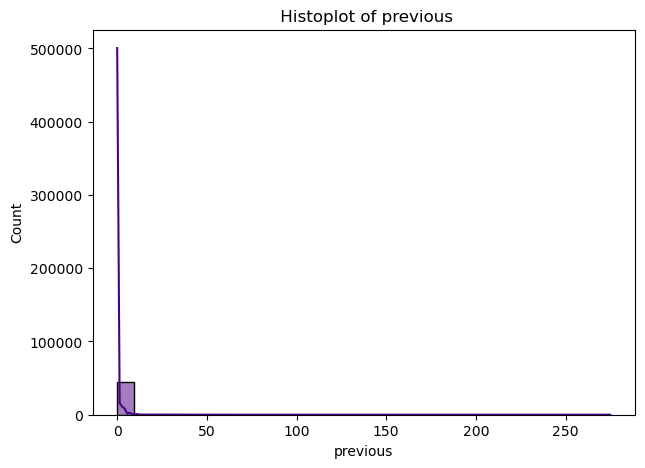

In [22]:
# Checking the distribution of Numerical columns

for col in numerical_df.columns:
    plt.figure(figsize=(7,5))
    sns.histplot(numerical_df[col], bins = 30, kde = True,color = 'indigo')
    plt.title(f' Histoplot of {col}')
    plt.show()

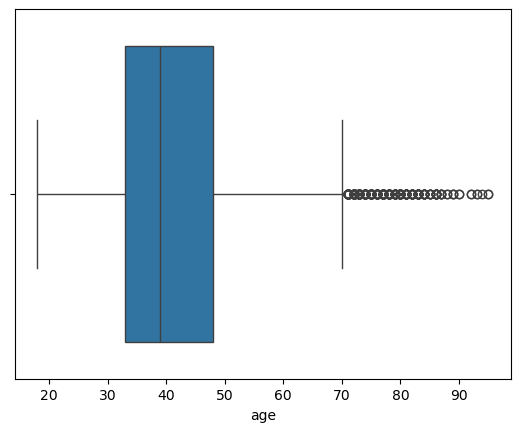

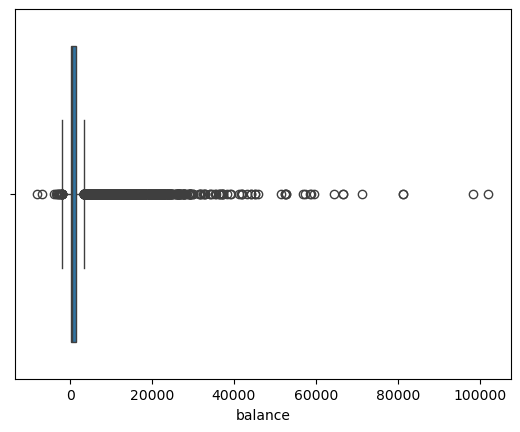

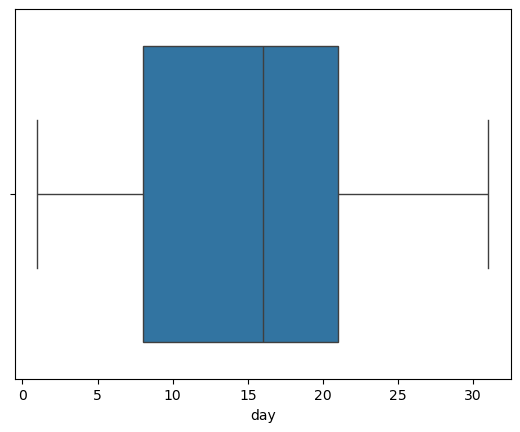

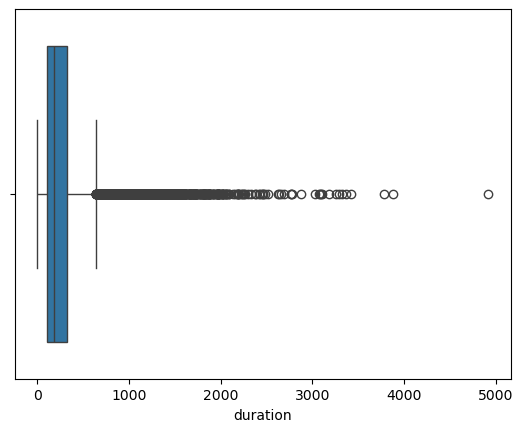

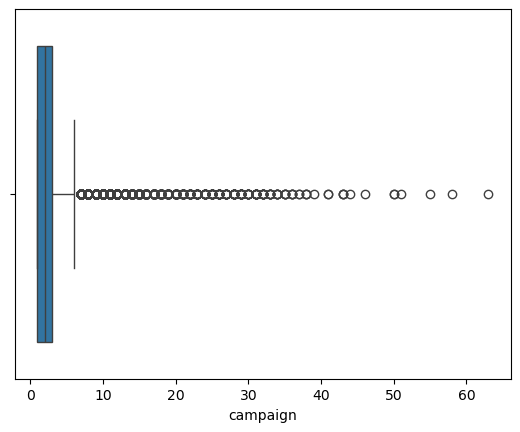

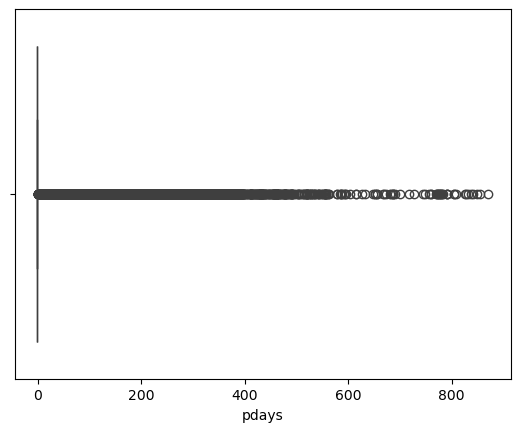

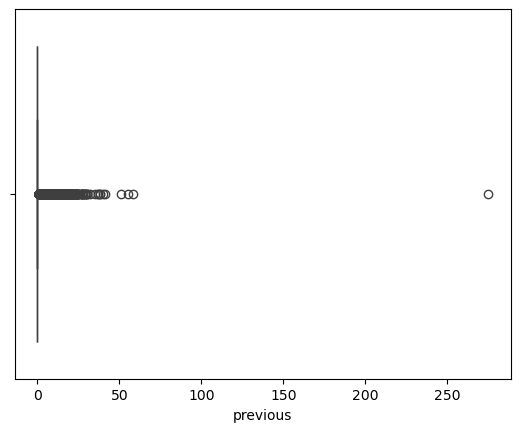

In [23]:
# Checking for Outliers
for i in numerical_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [24]:
# IQR Method
def outliers(df):
    for col in numerical_df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [25]:
# Calling the function
df1 = outliers(df)

In [26]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,643.0,3.0,-1.0,0.0,unknown,yes
45207,70.5,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2.0,-1.0,0.0,unknown,yes
45208,70.5,retired,married,secondary,no,3462.0,no,no,cellular,17,nov,643.0,5.0,-1.0,0.0,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4.0,-1.0,0.0,unknown,no


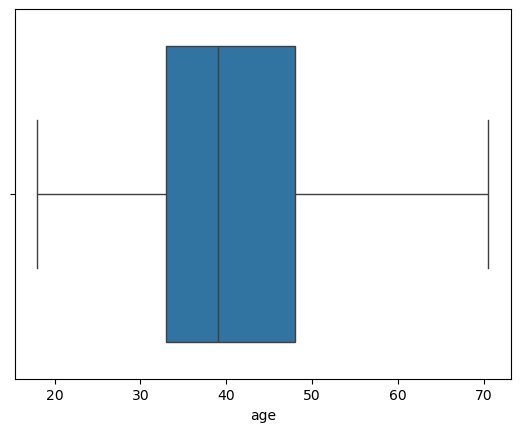

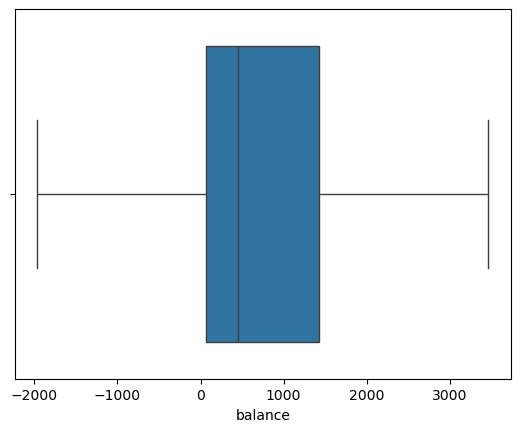

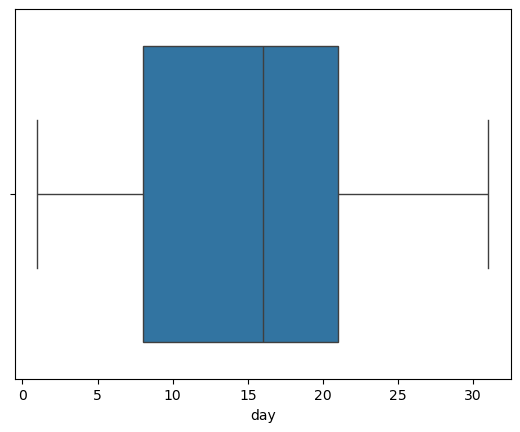

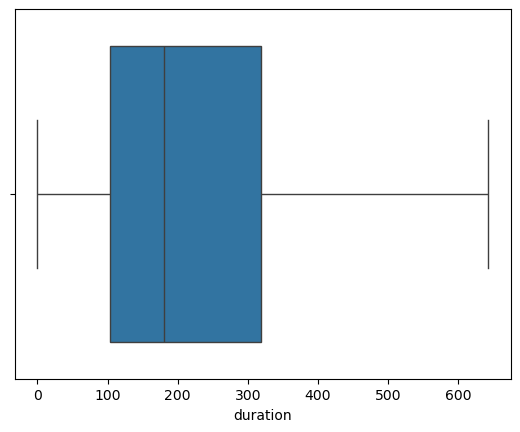

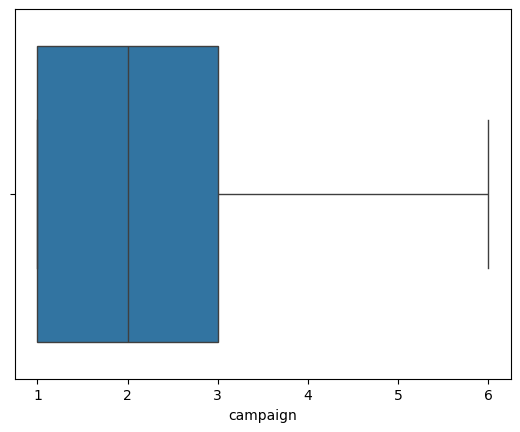

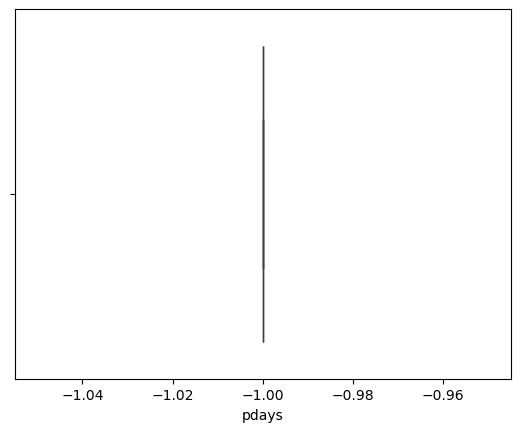

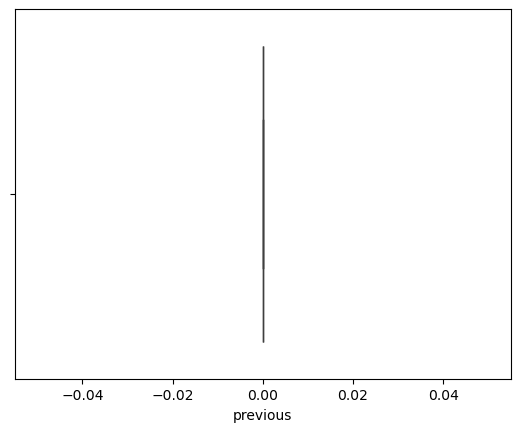

In [27]:
# Checking again to confirm there are no outliers
for i in numerical_df.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [28]:
# Checking the skewness
numerical_df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [29]:
# Handling Skewness

from sklearn.preprocessing import PowerTransformer

In [30]:
pt = PowerTransformer(method= 'yeo-johnson')

In [31]:
numerical_columns = df1.select_dtypes(include='number').columns

In [32]:
df1[numerical_columns] = pt.fit_transform(df1[numerical_columns])
print(df1[numerical_columns].skew())

age         0.005618
balance     0.174444
day        -0.157853
duration   -0.027948
campaign    0.176832
pdays       0.000000
previous    0.000000
dtype: float64


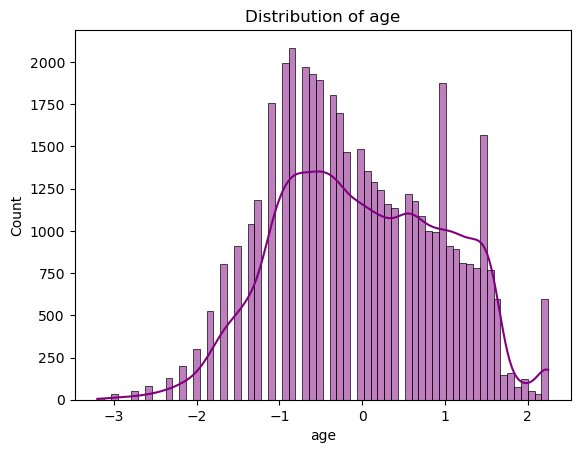

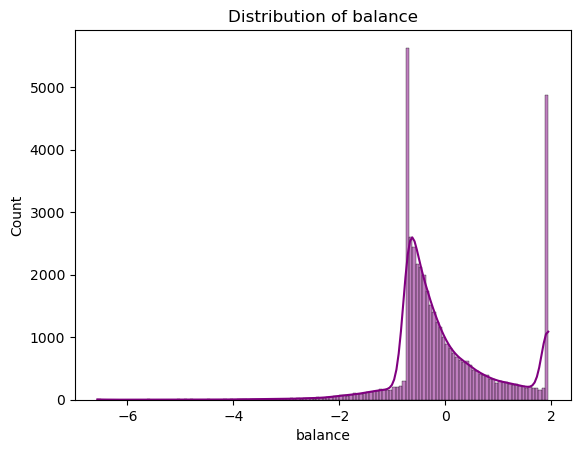

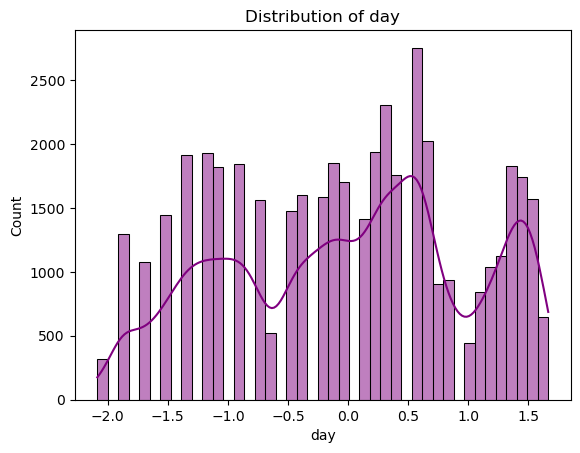

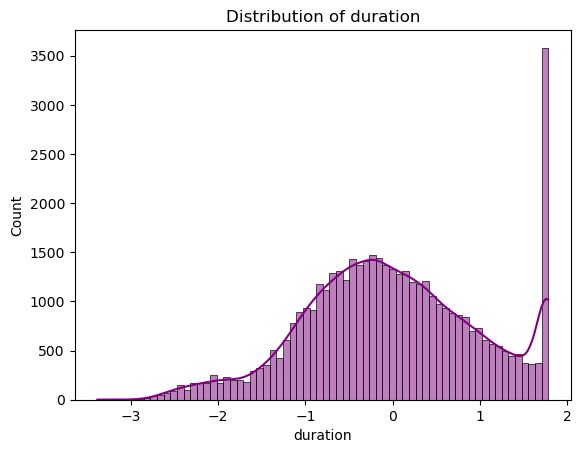

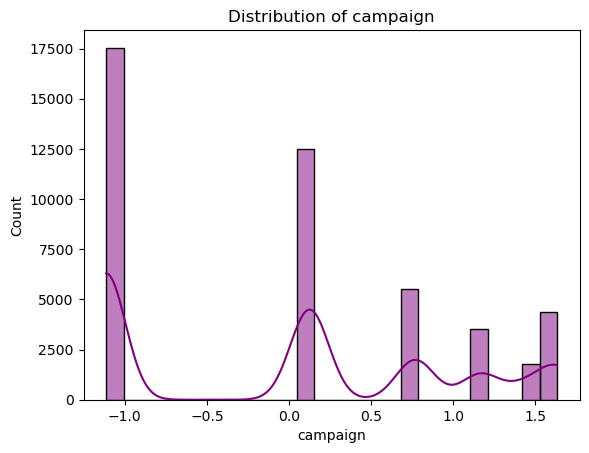

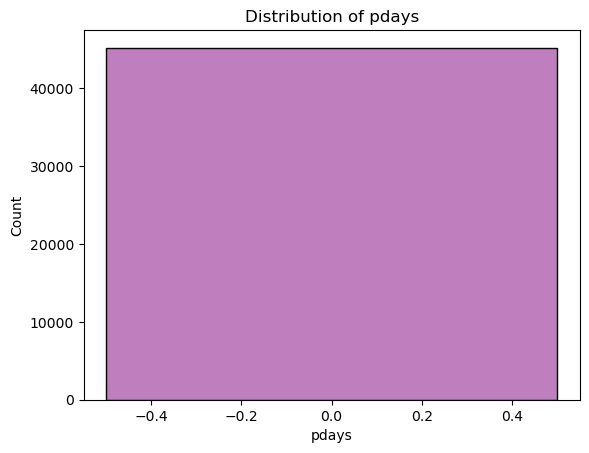

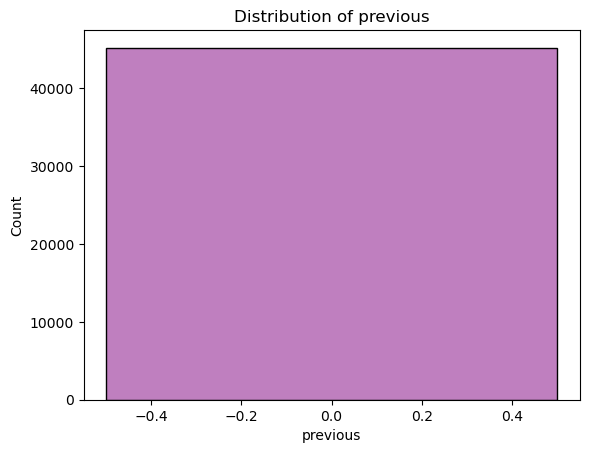

In [33]:
# Checking the Distribution
for i in numerical_columns:
    sns.histplot(data = df1, x= i,color = 'purple', kde = True)
    plt.title(f'Distribution of {i}')
    plt.show()

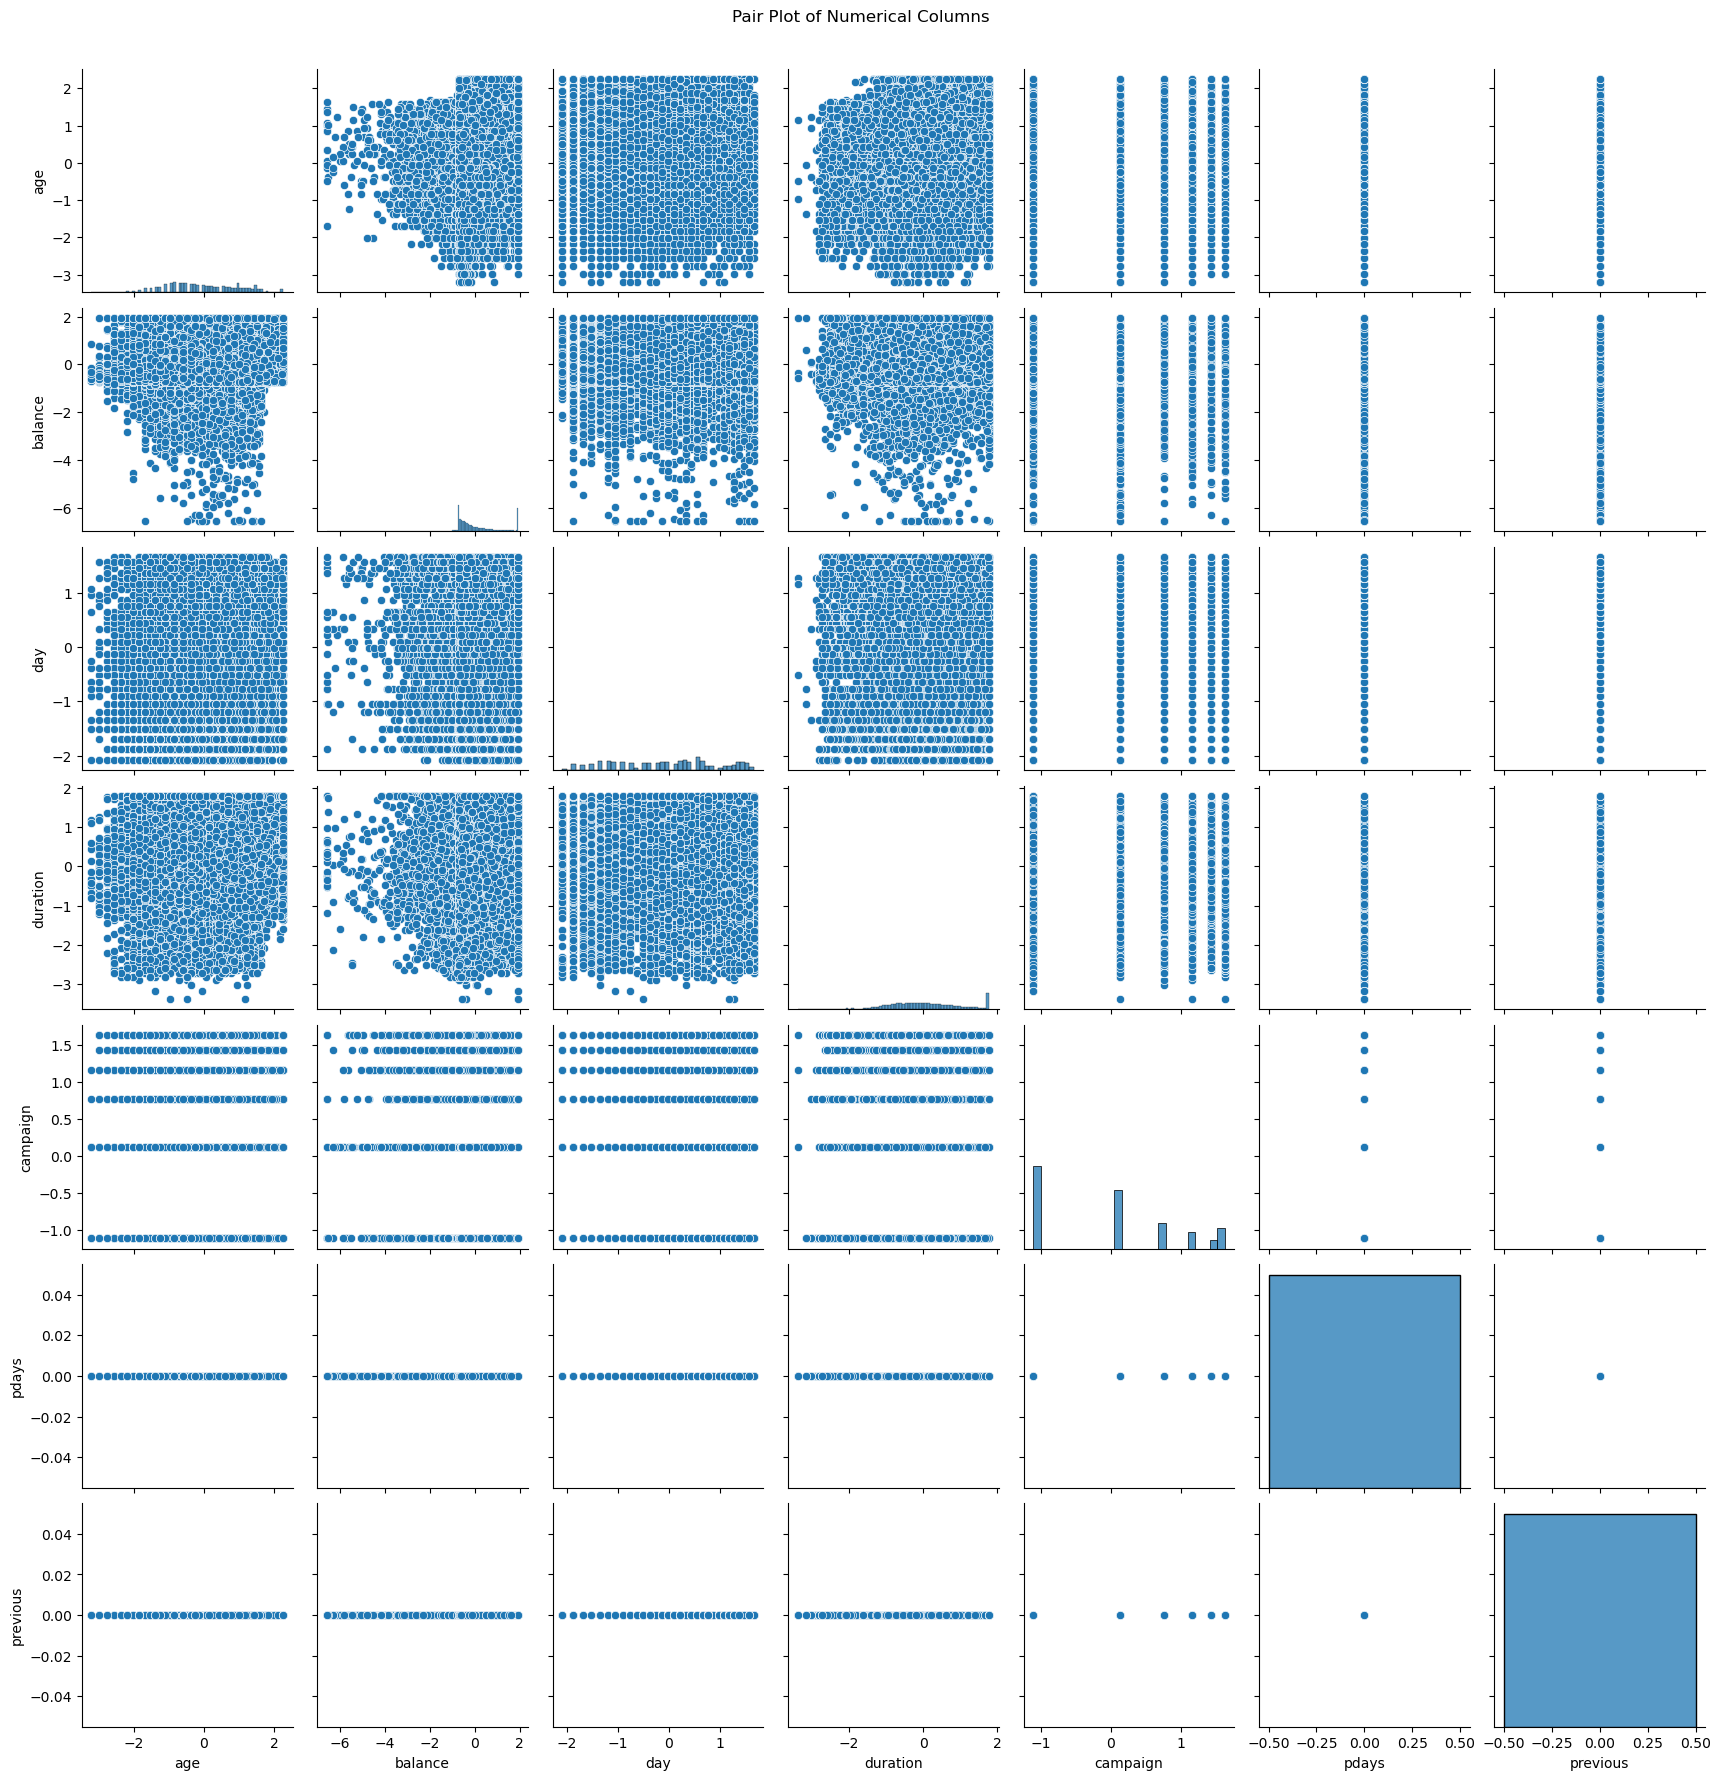

In [34]:
# Pair Plot for numerical columns

# Subset DataFrame with numerical columns only
numerical_df = df[numerical_columns]

# Simple pair plot
sns.pairplot(numerical_df)
plt.suptitle("Pair Plot of Numerical Columns",y=1.02)
plt.show()

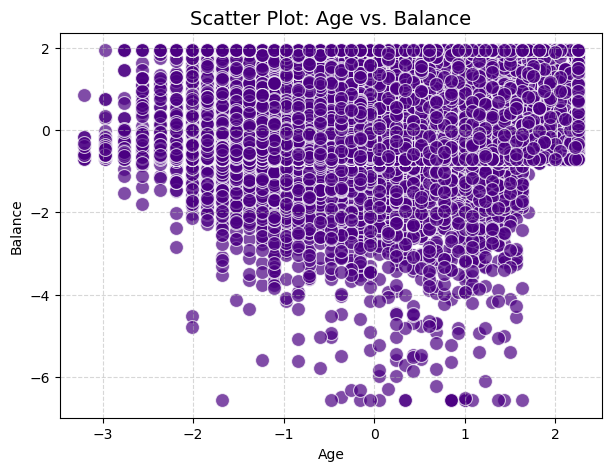

In [35]:
# Scatter plot between age and balance
plt.figure(figsize=(7, 5))

sns.scatterplot(data=df, x='age', y='balance', color='indigo', alpha=0.7, edgecolor='w', s=100)
plt.title("Scatter Plot: Age vs. Balance", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

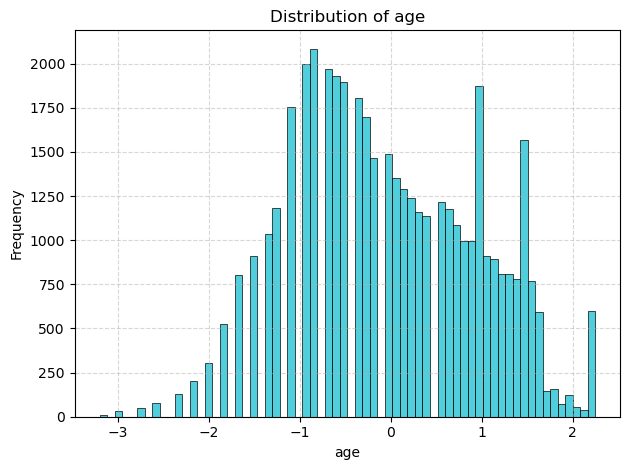

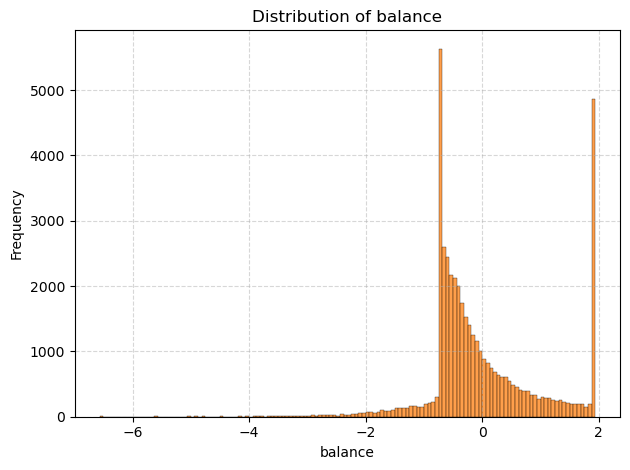

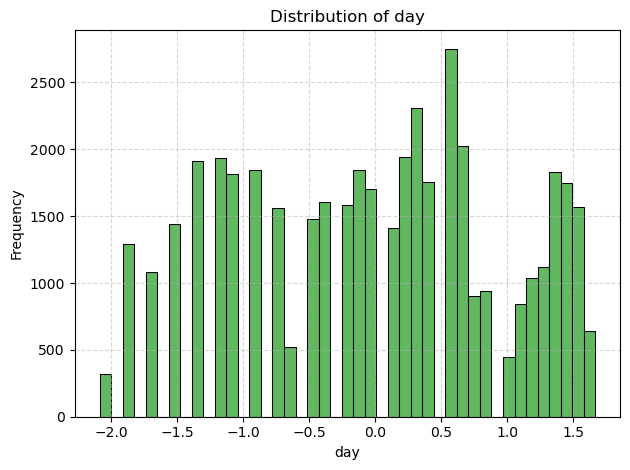

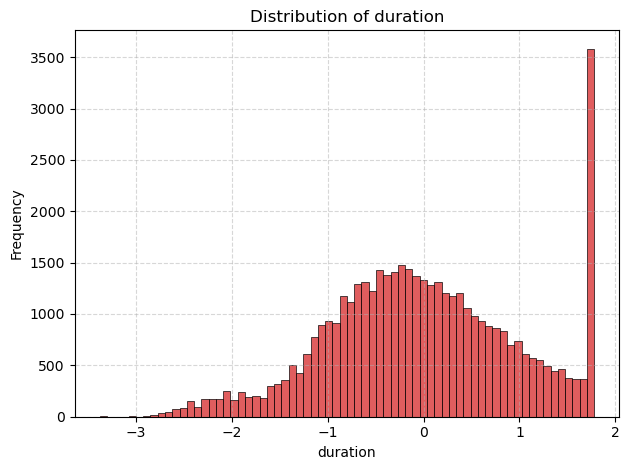

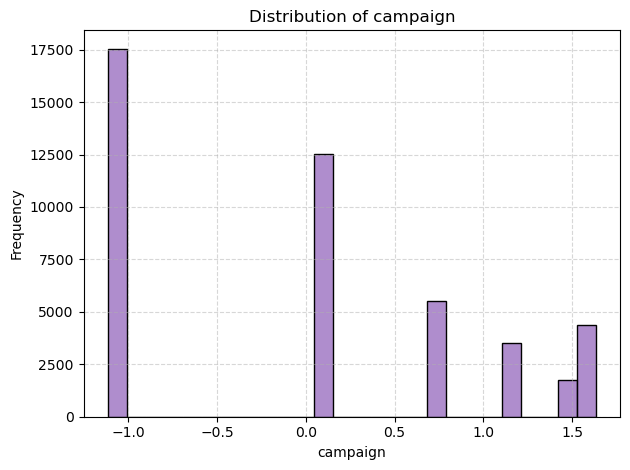

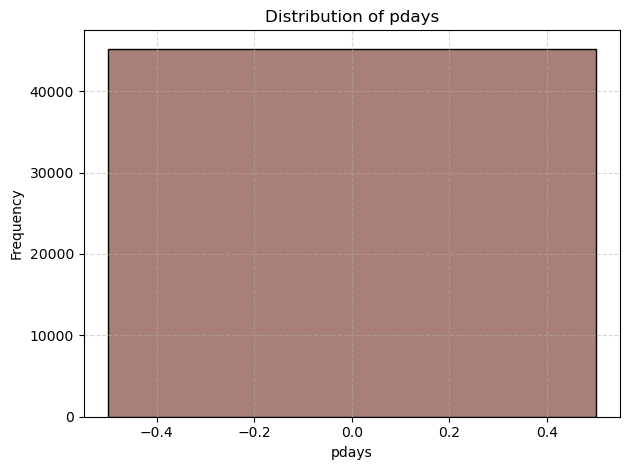

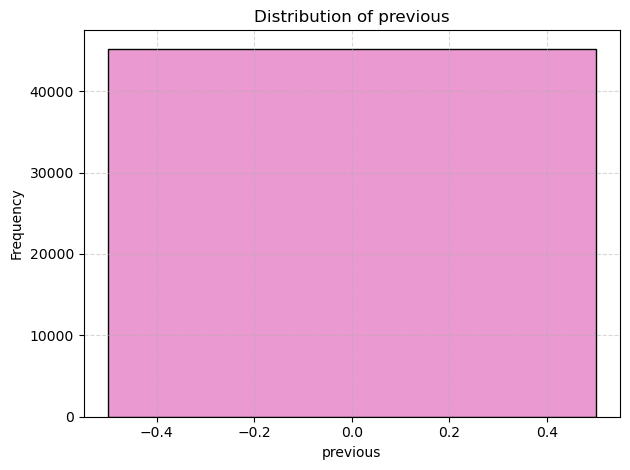

In [36]:
# Histplot for Numerical columns
colors = ['#17becf', '#ff7f0e', '#2ca02c', '#d62728', 
 '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

for idx, i in enumerate(numerical_columns):
    sns.histplot(data=df1, x=i, color=colors[idx % len(colors)])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [37]:
# Identifying categorical columns
categorical_df = df1.select_dtypes(include='object')
categorical_df

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


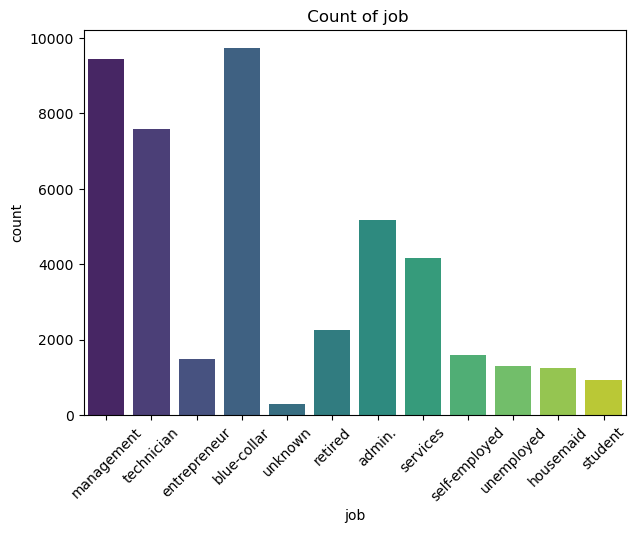

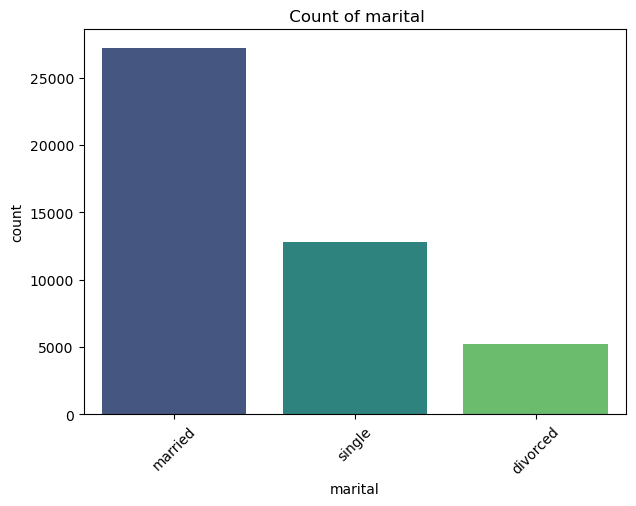

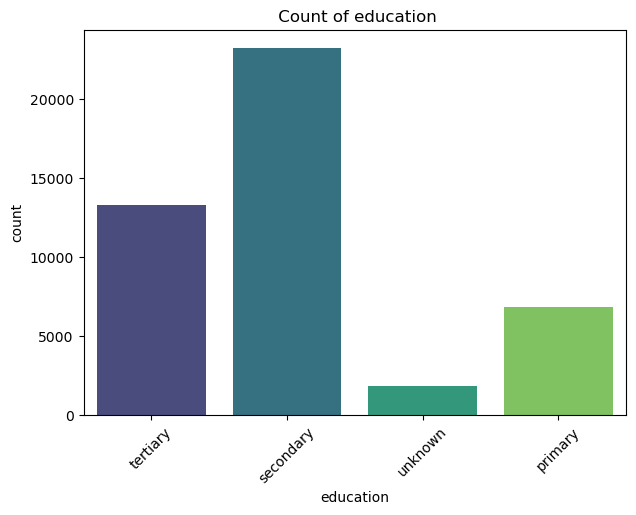

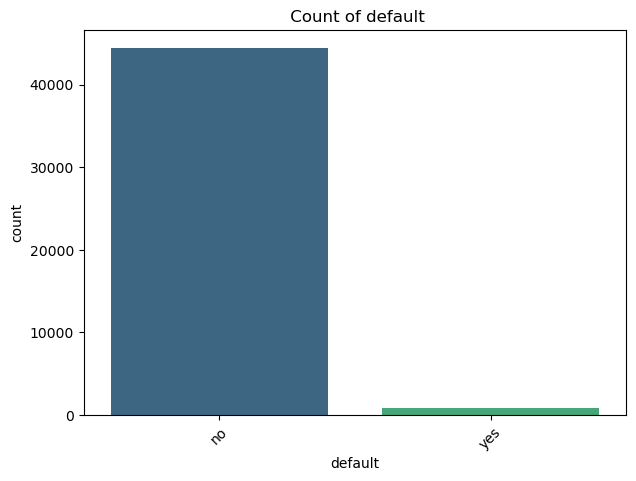

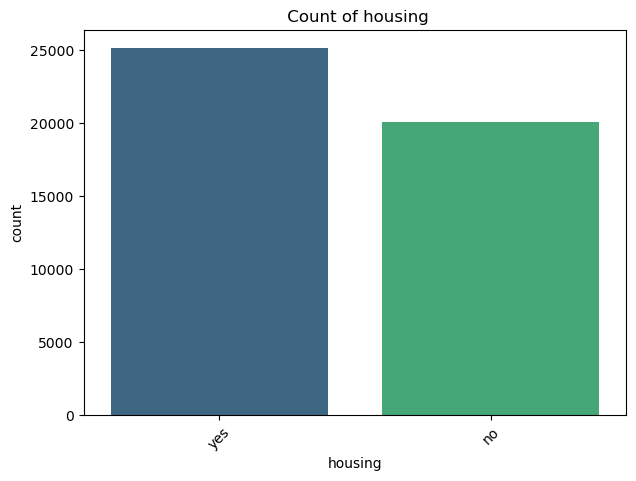

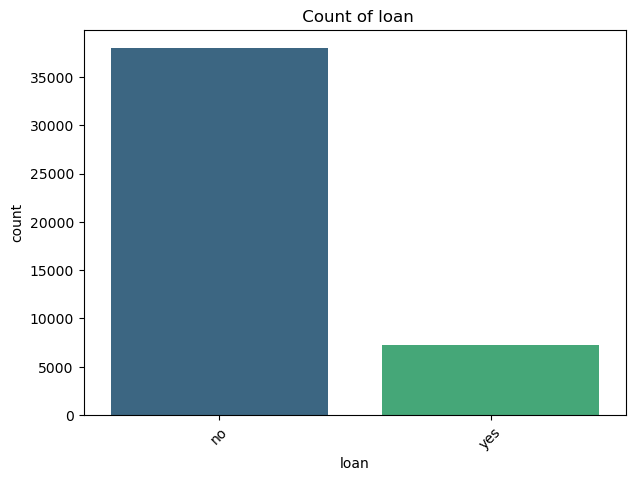

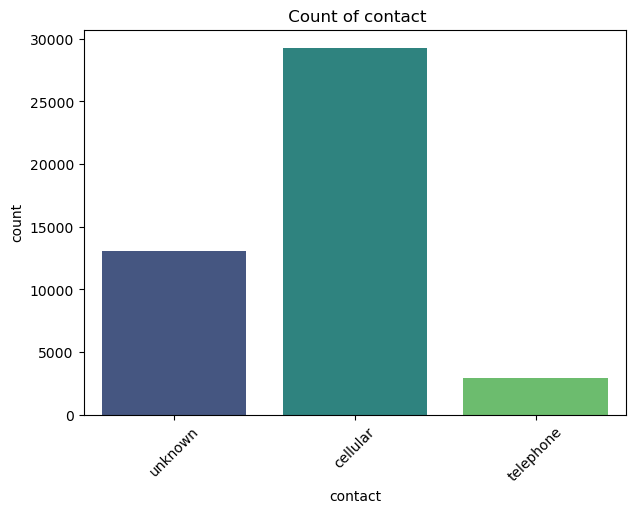

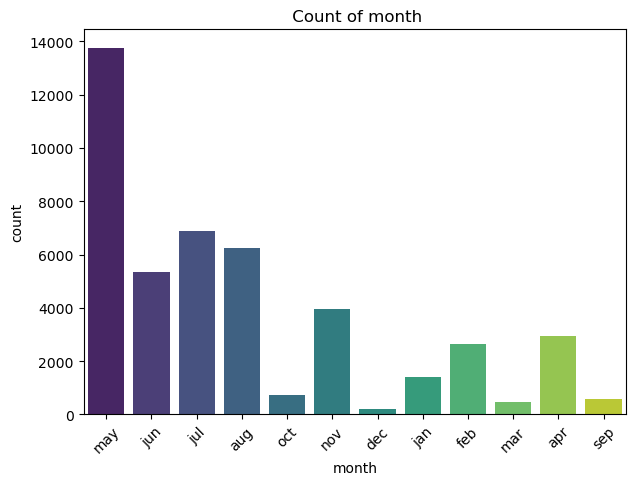

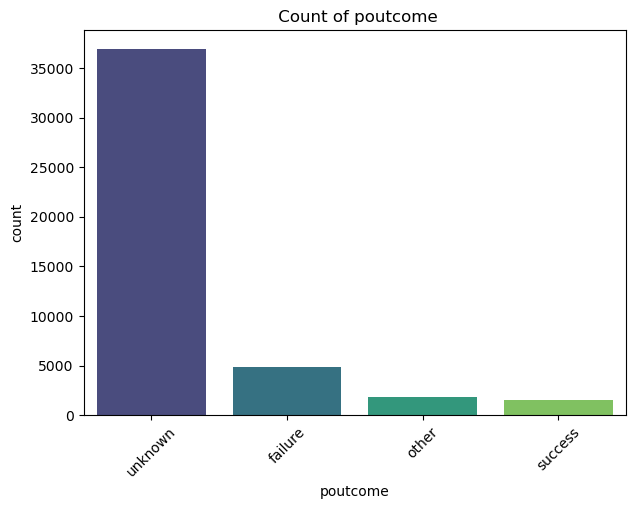

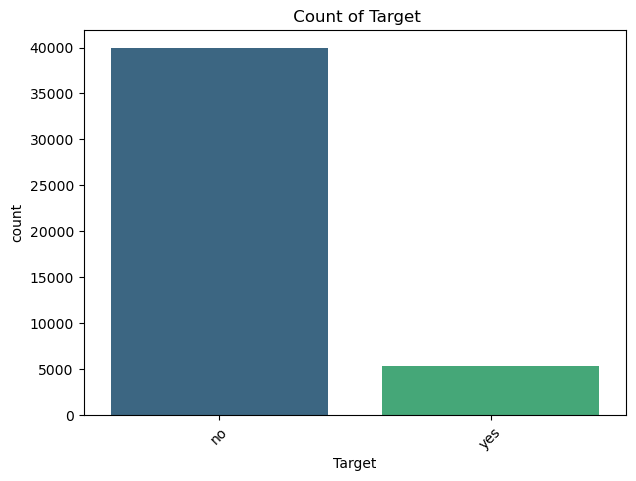

In [38]:
# Checking the distribution of Categorical columns

for col in categorical_df:
    plt.figure(figsize=(7,5))
    sns.countplot( data = df1, x= col,palette='viridis', hue = col)
    plt.title(f' Count of {col}')
    plt.xticks ( rotation = 45)
    plt.show()

### Encoding

In [40]:
# Importing the libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [41]:
le = LabelEncoder()

In [42]:
# Applying label encoding
# Boolean and Target - Label encoding
df1['Target'] = le.fit_transform(df1['Target'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])

In [43]:
df1['job'] = le.fit_transform(df1['job'])
df1['month'] = le.fit_transform(df1['month'])

In [44]:
# Define categorical columns
oho_cols = ['marital', 'education', 'contact','poutcome']

In [45]:
oho = OneHotEncoder(drop= 'first', sparse_output=False, dtype=int )

In [46]:
# Fit and transform
encoded_array = oho.fit_transform(df1[oho_cols])

In [47]:
# Converting to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=oho.get_feature_names_out(oho_cols),index = df1.index)

In [48]:
# Combining with the rest of the dataset
df_encoded = pd.concat([df1.drop(columns=oho_cols), encoded_df], axis = 1)

In [49]:
df_encoded.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,1.502190,4,0,1.007085,1,0,-1.351873,8,0.412248,-1.113596,...,1,0,0,1,0,0,1,0,0,1
1,0.426912,9,0,-0.680874,1,0,-1.351873,8,-0.264939,-1.113596,...,0,1,1,0,0,0,1,0,0,1
2,-0.717526,2,0,-0.713062,1,1,-1.351873,8,-0.978769,-1.113596,...,1,0,1,0,0,0,1,0,0,1
3,0.685811,1,0,0.537649,1,0,-1.351873,8,-0.793941,-1.113596,...,1,0,0,0,1,0,1,0,0,1
4,-0.717526,11,0,-0.714476,0,0,-1.351873,8,0.057359,-1.113596,...,0,1,0,0,1,0,1,0,0,1


In [50]:
df_encoded.shape

(45211, 23)

In [51]:
df_encoded.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'Target',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [52]:
# Finding the corelation

cor = df_encoded.corr()

In [53]:
cor

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.034012,-0.015586,0.104697,-0.157672,-0.007659,-0.005256,-0.043071,-0.020448,0.036282,...,0.311736,-0.459909,-0.091418,-0.074822,0.060873,0.142067,-0.004862,-0.027335,0.017178,0.007848
job,-0.034012,1.000000,-0.006853,0.023606,-0.125363,-0.033004,0.018171,-0.092870,0.003269,0.010976,...,-0.093245,0.092562,0.043268,0.097562,0.023773,-0.002573,-0.080668,-0.003597,0.027324,0.001535
default,-0.015586,-0.006853,1.000000,-0.170392,-0.006025,0.077234,0.008784,0.011486,-0.007505,0.013877,...,-0.014460,0.003115,0.013220,-0.015239,-0.001236,-0.017208,0.019933,-0.014445,-0.023344,0.039490
balance,0.104697,0.023606,-0.170392,1.000000,-0.094340,-0.138400,0.002823,0.006461,0.037558,-0.026468,...,0.027642,-0.004180,-0.079784,0.084133,0.018992,0.052038,-0.057850,0.016536,0.066612,-0.065545
housing,-0.157672,-0.125363,-0.006025,-0.094340,1.000000,0.041323,-0.021017,0.271481,0.001376,-0.038277,...,0.017681,-0.020475,0.101659,-0.099175,-0.047595,-0.080822,0.208409,0.039710,-0.091360,-0.063755
loan,-0.007659,-0.033004,0.077234,-0.138400,0.041323,1.000000,0.010623,0.022145,-0.011550,0.001208,...,0.036906,-0.051716,0.070625,-0.045940,-0.049992,-0.013183,-0.007211,-0.009099,-0.053713,0.031406
day,-0.005256,0.018171,0.008784,0.002823,-0.021017,0.010623,1.000000,0.004427,-0.053035,0.138647,...,0.009804,-0.010727,-0.005406,0.019085,-0.001160,0.021547,-0.036216,-0.033123,-0.031367,0.084610
month,-0.043071,-0.092870,0.011486,0.006461,0.271481,0.022145,0.004427,1.000000,0.004649,-0.142350,...,-0.025927,0.009369,0.043165,-0.080724,0.015336,-0.004616,0.359322,0.005385,0.007806,-0.031538
duration,-0.020448,0.003269,-0.007505,0.037558,0.001376,-0.011550,-0.053035,0.004649,1.000000,-0.114731,...,-0.018740,0.018415,0.012741,-0.005455,-0.001149,-0.056173,-0.026266,-0.008240,0.074113,-0.025851
campaign,0.036282,0.010976,0.013877,-0.026468,-0.038277,0.001208,0.138647,-0.142350,-0.114731,1.000000,...,0.053260,-0.047258,-0.023608,0.014465,-0.007681,0.059931,-0.015113,-0.002996,-0.073420,0.115529


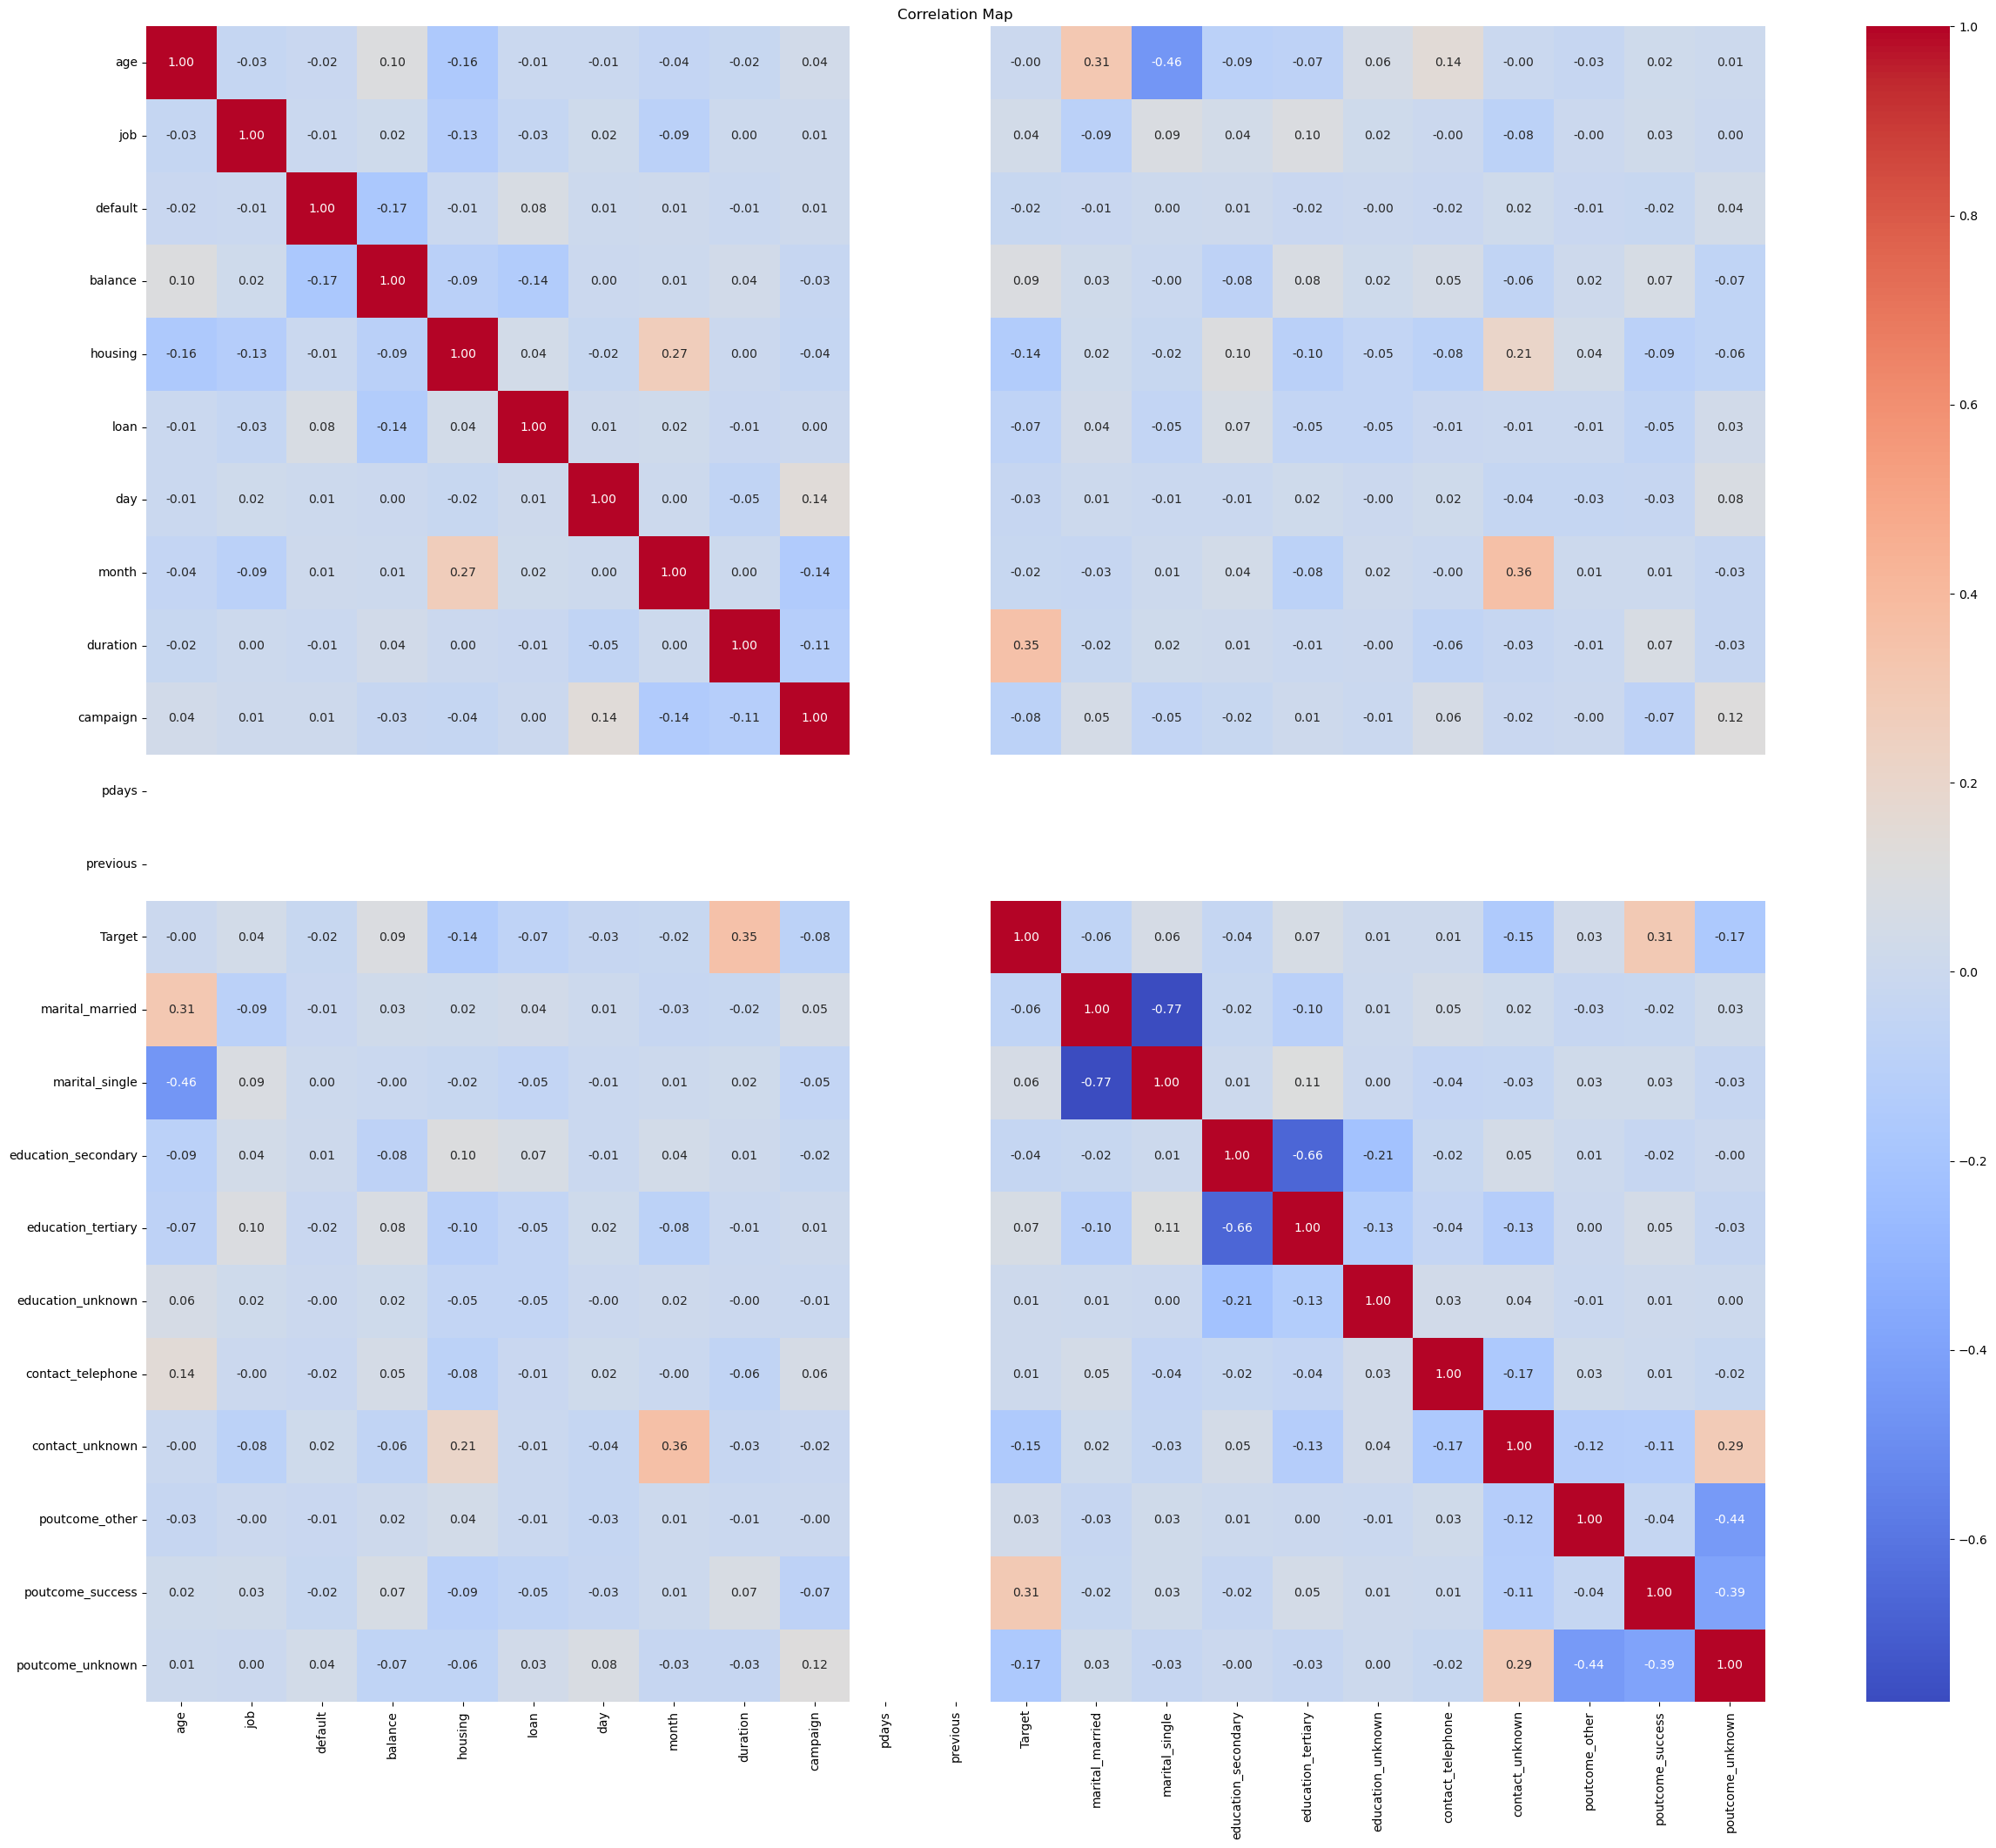

In [54]:
# Plotting the Heat map
plt.figure(figsize=(30,25))
sns.heatmap(cor, annot= True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Map')
plt.show()

## Feature Selection

In [56]:
# Splitting into X and y

X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

In [57]:
from sklearn.feature_selection import SelectKBest,f_classif

In [58]:
sk = SelectKBest(score_func=f_classif, k = 20)

In [59]:
k_best = sk.fit_transform(X,y)

C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [60]:
selected_features = X.columns[sk.get_support()]

In [61]:
selected_features

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [62]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score' : sk.scores_
}).sort_values(by ='Score', ascending = False)

In [63]:
feature_score

,Features,Score
8,duration,6376.731802
20,poutcome_success,4697.113837
21,poutcome_unknown,1297.815887
18,contact_unknown,1053.932776
4,housing,892.950576
3,balance,410.837267
9,campaign,321.656249
5,loan,211.167395
15,education_tertiary,200.499806
13,marital_single,183.181227


In [64]:
# Considering the values above 1 
sk = SelectKBest(score_func=f_classif, k = 16)
k_best = sk.fit_transform(X,y)
selected_features = X.columns[sk.get_support()]

C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [10 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [65]:
selected_features

Index(['job', 'balance', 'housing', 'loan', 'day', 'month', 'duration',
       'campaign', 'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [66]:
X_selected = X[selected_features]

In [67]:
X_selected.columns

Index(['job', 'balance', 'housing', 'loan', 'day', 'month', 'duration',
       'campaign', 'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [68]:
# Importing necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
sc = StandardScaler()

In [70]:
X_scaled = sc.fit_transform(X_selected)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,train_size=0.8, random_state=42)

In [72]:
#Importing Essential Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing evaluation metrics for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [73]:
## Model Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting" :GradientBoostingClassifier(),
    "SVM": SVC()
}

In [74]:
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train,y_train)

    #predicting
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrics": cm,
        "Classification Report": cr
    }

In [75]:
# Print the results

for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrics']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression Results:
Accuracy: 0.8928
Confusion Matrix:
[[7752  200]
 [ 769  322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.62      0.30      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.63      0.67      9043
weighted avg       0.87      0.89      0.88      9043


Decision Tree Results:
Accuracy: 0.8702
Confusion Matrix:
[[7358  594]
 [ 580  511]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.46      0.47      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Random Forest Results:
Accuracy: 0.8977
Confusion Matrix:
[[7689  263]
 [ 662  429]]
Classification Report:
             

#### Choosing Gradient Boosting as the best mode with highest accuracy and F1 score

In [77]:
# Importing Libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib # To save model

In [78]:
pipeline = Pipeline([
    ('Imputer',SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler()),
     ('Model', RandomForestClassifier())
])

In [79]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Model', RandomForestClassifier())])

In [80]:
y_pred = pipeline.predict(X_test)

In [81]:
# To Save the model and load

joblib.dump(pipeline, 'Bank_Marketing.joblib')

['Bank_Marketing.joblib']

In [82]:
# Loading the model

pipeline_loaded = joblib.load('Bank_Marketing.joblib')

### Predicting an Unseen data

In [84]:
X_new = X_selected
y_new = df_encoded['Target']
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,train_size=0.8, random_state=42)

In [85]:
Gradient_Boosting = GradientBoostingClassifier()
Gradient_Boosting.fit(X_train,y_train)

GradientBoostingClassifier()

In [86]:
# Define new Individual data
new_individual = [[4.0, 233.0,1.0,0.0,7.0,8.0,193.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0 ]]

# Standardize the new data using the same scaler
new_individual_scaled = sc.transform(new_individual)

# Make predictions for the new passenger
prediction = Gradient_Boosting.predict(new_individual_scaled)

if prediction[0] == 1:
    print("Subscription to a term deposit")
else:
    print("No subscription to a term deposit")

Subscription to a term deposit


C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
